### Full DataFrame, Salary Errors

In [1]:
#from collections import defaultdict
#from pathlib import Path
import json

import os 
import time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russell_df = pd.read_csv('russell_3000_index.csv')

ticker_list = russell_df['Ticker']

In [3]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [4]:
starter_df = pd.DataFrame(starter_df.iloc[0]).T

In [5]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker XTSLA threw an error
Ticker USD threw an error
Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
Ticker MSFUT threw an error
Ticker ESU2 threw an error
Ticker RTYU2 threw an error
This code took 212.71596598625183 seconds


In [8]:
starter_df.reset_index(inplace=True,drop=True)
starter_df.head()

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN
1,21bce6f864ee3d67e61232da5e371dcc,320193,AAPL,Jeff Williams,Chief Operating Officer,2021,1000000,0,21959620,0,4000000,17437,26977057,NaN
2,39c3be85559f978fceb001ed65f805a9,320193,AAPL,Tim Cook,Chief Executive Officer,2021,3000000,0,82347835,0,12000000,1386559,98734394,NaN
3,5672125e1128cae081168ab797e4184f,320193,AAPL,Kate Adams,"Senior Vice President, General Counsel and Sec...",2021,1000000,0,21959620,0,4000000,14533,26974153,NaN
4,c34027ebeff9e609633c259618269ca3,320193,AAPL,Luca Maestri,"Senior Vice President, Chief Financial Officer",2021,1000000,0,21959620,0,4000000,18883,26978503,NaN


### Visualizations to Find Errors

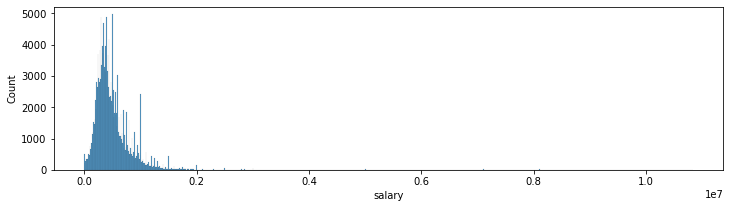

In [395]:
plt.figure(figsize=(12,3))
sns.histplot(data=starter_df[starter_df['salary']>1], x='salary');

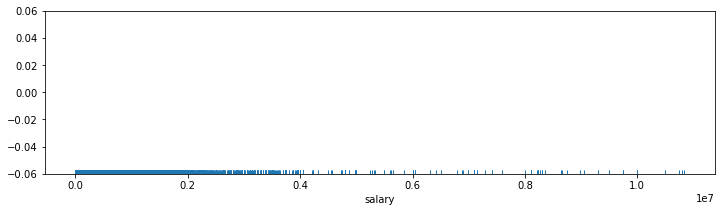

In [396]:
plt.figure(figsize=(12,3))
sns.rugplot(x=starter_df['salary']);

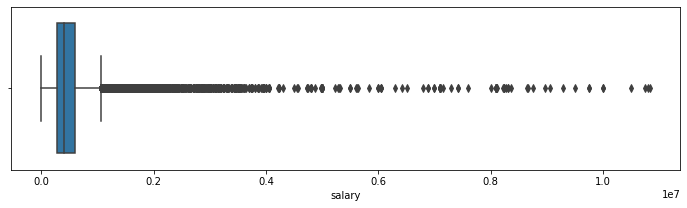

In [397]:
plt.figure(figsize=(12,3))
sns.boxplot(x=starter_df['salary']);

In [50]:
starter_df[['salary']].astype('float').idxmax()

salary    31254
dtype: int64

In [424]:
#find the index of the highest salary
highest_salary_index = starter_df[['salary']].astype('float').idxmax()

#only run this the first time
#mistakes_df = starter_df.iloc[highest_salary_index].copy()

#look at this highest salary, which is clearly incorrect
starter_df.iloc[highest_salary_index]


,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
51630,bbdd4cf6fa44aa29cc4fa43ed6c5fada,59558,LNC,Dennis R. Glass,President and CEO of LNC,2007,9292315,0,2161080,3845660,2352781,4475008,18000852,4237092.0


In [422]:
mistakes_df = pd.concat([mistakes_df,starter_df.iloc[highest_salary_index]])

In [423]:
#dropping the highest salary row
starter_df.drop(labels=[highest_salary_index[0]],axis=0,inplace=True)
starter_df.reset_index(inplace=True, drop=True)

In [432]:
mistakes_df.to_csv('mistakes.csv')#,index = False)

In [430]:
mistakes_df['ticker'].value_counts()

FBMS    60
MAA     29
CSR      8
JEF      8
VBIV     2
PDFS     2
PEBO     2
SWTX     1
XRX      1
AIG      1
REI      1
CMPR     1
Name: ticker, dtype: int64